In [3]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다
from google.colab import drive
import matplotlib.image as mping
import matplotlib.pyplot as plt


In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
pwd

'/content/drive/MyDrive'

In [24]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 24, 24, 3
images = []

for i in range(40):
    file = url + 'img{0:02d}.jpg'.format(i+1)    # 이미지 파일 이름을 만든다
    img = imread(file)                           # 이미지를 읽는다
    img = resize(img, (imgR,imgC, channel))      # 이미지의 크기를 변경한다
    images.append(img)                           # images 리스트에 담는다담는다

In [25]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

<Figure size 432x288 with 0 Axes>

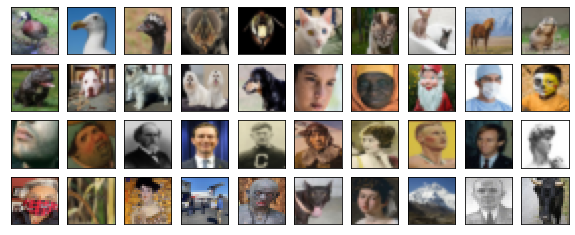

In [26]:
plot_images(4, 10, images)

<Figure size 432x288 with 0 Axes>

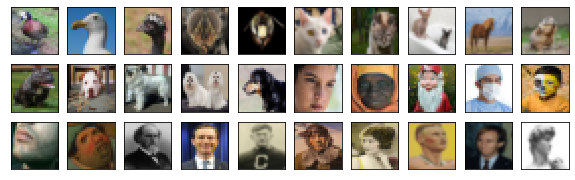

<Figure size 432x288 with 0 Axes>

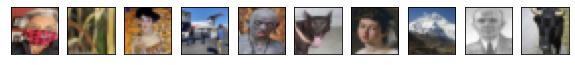

In [27]:
X = np.array(images[:30])
X_test = np.array(images[30:])
plot_images(3, 10, X)
plot_images(1, 10, X_test)

In [28]:
# 잡음을 생성하자
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.1
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy =  X_test+ np.random.randn(len(X_test),imgR,imgC,channel)*0.1
X_test_noisy = np.clip(X_test_noisy, 0, 1)

<Figure size 432x288 with 0 Axes>

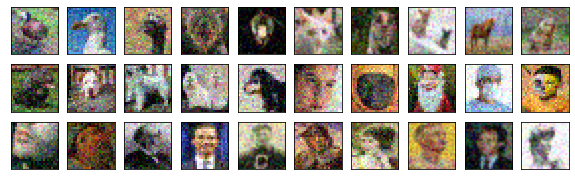

<Figure size 432x288 with 0 Axes>

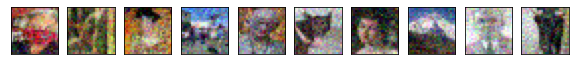

In [29]:
# 잡음이 추가된 이미지들을 그려보자
plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

In [30]:
X_noisy_flat = X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel) * 255, dtype=np.uint)


In [31]:
# 잡음 이미지를 입력으로 깨끗한 이미지를 정답으로 분류기를 훈련시켜 보자
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

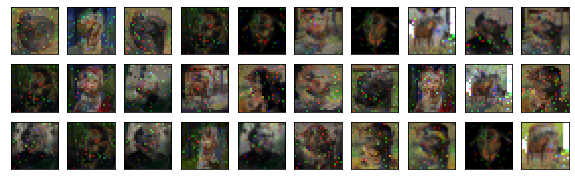

In [32]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

In [33]:
# 데이터 증강을 통해 kNN을 적용하자.
n_augmentation = 100
X_noisy_aug = X + np.random.rand(len(X), imgR, imgC, channel) * 0.2
y_label = np.array(X * 255, dtype = np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
    noisy_data = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
    X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis=0)
    y = np.append(y, y_label, axis = 0)

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

<Figure size 432x288 with 0 Axes>

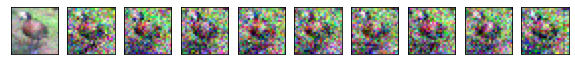

In [34]:
# 슬라이싱을 이용해서 데이터의 일부를 그려보자
plot_images(1, 10, X_noisy_aug[0:300:30])

In [35]:
# 늘어난 데이터로 훈련을 시켜보자
X_noisy_aug_flat = X_noisy_aug.reshape(-1, imgR*imgC*channel)
y_flat = y.reshape(-1, imgR*imgC*channel)

knn.fit(X_noisy_aug_flat, y_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

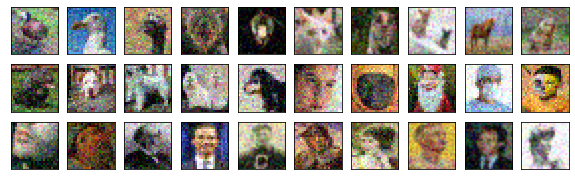

<Figure size 432x288 with 0 Axes>

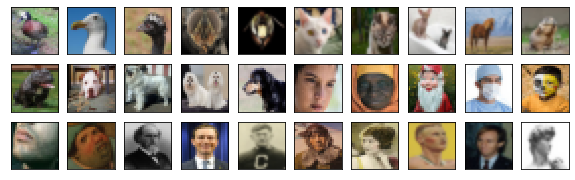

In [36]:
# 잡음이 포함된 X_noisy_flat 이미지를 kNN 알고리즘을 이용하여 잡음을 제거
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)

plot_images(3, 10, X_noisy)
plot_images(3, 10, denoised_result)

<Figure size 432x288 with 0 Axes>

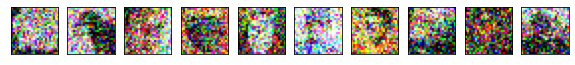

<Figure size 432x288 with 0 Axes>

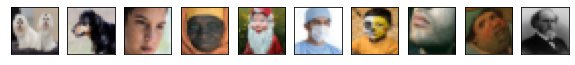

In [37]:
rndidx = np.random.randint(0, 20)
data = X[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel)*0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0, 255)

plot_images(1, 10, data)
plot_images(1, 10, denoised)

<Figure size 432x288 with 0 Axes>

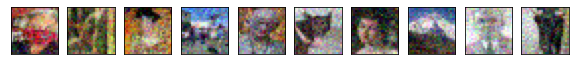

<Figure size 432x288 with 0 Axes>

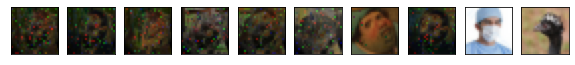

In [38]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

<Figure size 432x288 with 0 Axes>

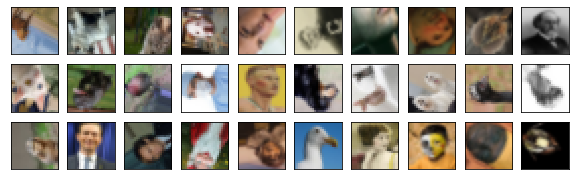

In [39]:
### 이미지 데이터를 증강시키기 ####
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.1

n_augmentation = 500
for _ in range(n_augmentation):
    new_y = it.next()
    new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.1
    y_aug = np.append(y_aug, new_y)    
    X_aug = np.append(X_aug, new_X)

y_aug = np.array(y_aug * 255, dtype = np.uint)
y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)

y_aug = np.clip(y_aug, 0,255)
X_aug = np.clip(X_aug, 0, 1)
plot_images(3, 10, y_aug[30:])

In [40]:
X_aug_flat = X_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(X_aug_flat, y_aug_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

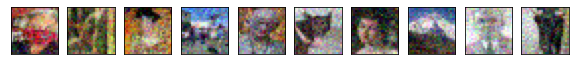

<Figure size 432x288 with 0 Axes>

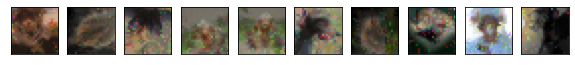

In [41]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

<Figure size 432x288 with 0 Axes>

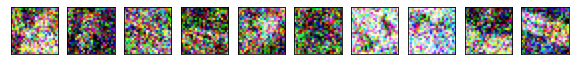

<Figure size 432x288 with 0 Axes>

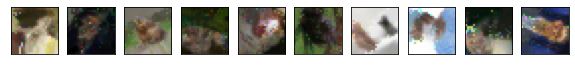

In [42]:
# 보다 더 강한 잡음을 추가하도록 하자
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel)*0.4
testX = np.clip(testX, 0, 1)
denoised = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, testX)
plot_images(1, 10, denoised)